In [4]:
from utils import cp_detector as cpd
from utils import data_generation as gen
from utils import statistic_calculation as stat
from utils import threshold_calculation as th

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [136]:
lin_stat_alpha = {}
lin_stat_alpha_ln = {}
lin_stat_beta = {}
lin_stat_beta_ln = {}

dataset_parameters = {
    "dataset_size": 500,
    "seq_len": 101,
    "d": 10,
    "p": 5,
    "distribution": "t-distribution",
    "k": 10,
    "cp": None,
    "nu": 10
}

cp_parameters = {
    "alpha": 0.05,
    "scan": False,
    "data_based": False,
    "ln": False
}

for d in range(10, 1000, 50):
    print(d)
    dataset_parameters["d"] = d
    (fn, fp), (fn_ln, fp_ln) = cpd.cpd_with_ln_compare(
        dataset_parameters, cp_parameters, data_type="t-distribution"
    )
    lin_stat_alpha[d] = fp
    lin_stat_alpha_ln[d] = fp_ln
    lin_stat_beta[d] = fn
    lin_stat_beta_ln[d] = fn_ln

100
0.0 1.0
350


KeyboardInterrupt: 

In [9]:
# import pickle

# with open('alpha.pickle', 'rb') as f:
#     lin_stat_alpha = pickle.load(f)
# with open('beta.pickle', 'rb') as f:
#     lin_stat_beta = pickle.load(f)
# with open('alpha_ln.pickle', 'rb') as f:
#     lin_stat_alpha_ln = pickle.load(f)
# with open('beta_ln.pickle', 'rb') as f:
#     lin_stat_beta_ln = pickle.load(f)

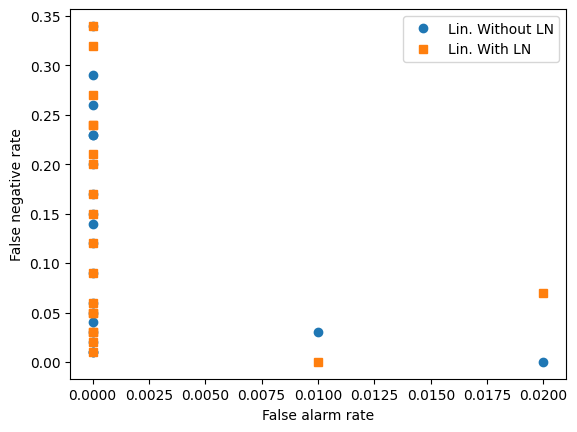

In [10]:
plt.plot(
    [value for value in lin_stat_alpha.values()],
    [value for value in lin_stat_beta.values()],
    "o",
    label="Lin. Without LN",
)

plt.plot(
    [value for value in lin_stat_alpha_ln.values()],
    [value for value in lin_stat_beta_ln.values()],
    "s",
    label="Lin. With LN",
)

plt.xlabel("False alarm rate")
plt.ylabel("False negative rate")
plt.legend()

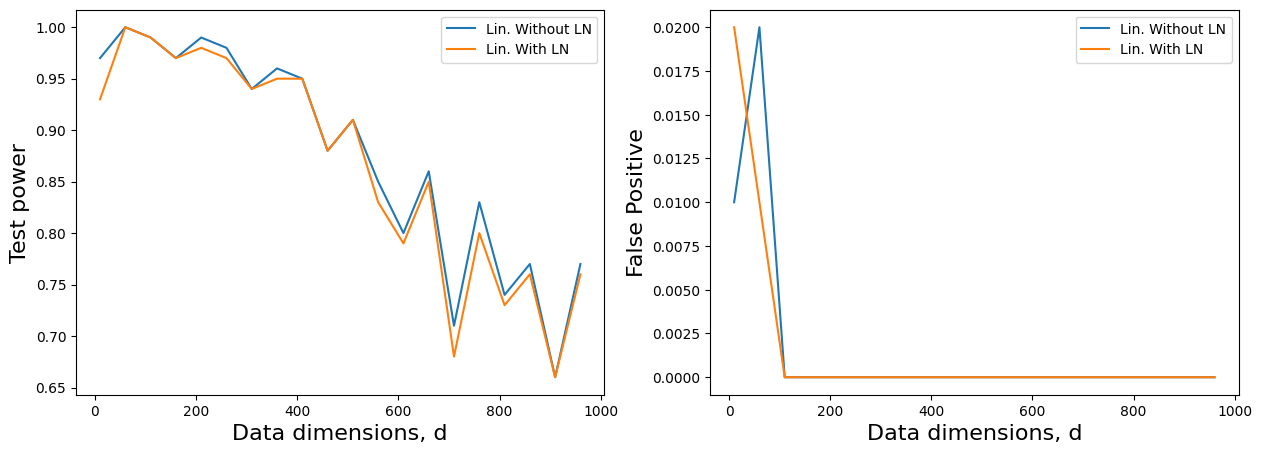

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(
    [key for key in lin_stat_beta.keys()],
    [1 - value for value in lin_stat_beta.values()],
    label="Lin. Without LN",
)

ax1.plot(
    [key for key in lin_stat_beta_ln.keys()],
    [1 - value for value in lin_stat_beta_ln.values()],
    label="Lin. With LN",
)

ax1.set_xlabel("Data dimensions, d", fontsize=16)
ax1.set_ylabel("Test power", fontsize=16)
ax1.legend()

ax2.plot(
    [key for key in lin_stat_beta.keys()],
    [value for value in lin_stat_alpha.values()],
    label="Lin. Without LN",
)

ax2.plot(
    [key for key in lin_stat_beta_ln.keys()],
    [value for value in lin_stat_alpha_ln.values()],
    label="Lin. With LN",
)

ax2.set_xlabel("Data dimensions, d", fontsize=16)
ax2.set_ylabel("False Positive", fontsize=16)
plt.legend()

In [451]:
dataset_parameters = {
    "dataset_size": 50,
    "seq_len": 101,
    "d": 200,
    "p": 5,
    "distribution": "t-distribution",
    "k": 1.5,
    "cp": None,
    "nu": 10
}

cp_parameters = {
    "alpha": 0.05,
    "ln": False,
    "scan": False,
    "data_based": True,
}

In [455]:
t_data_with_cp, t_data_without_cp, t_cp_idxs = gen.generate_data(**dataset_parameters)
t_predicted_cp, likelihood_cp = cpd.detect_cps_t_dist(t_data_with_cp, dataset_parameters, cp_parameters["alpha"])
# norm_predicted_cp, l_statistic = cpd.detect_cps_normal(t_data_with_cp, dataset_parameters, **cp_parameters)

In [456]:
t_predicted_cp

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

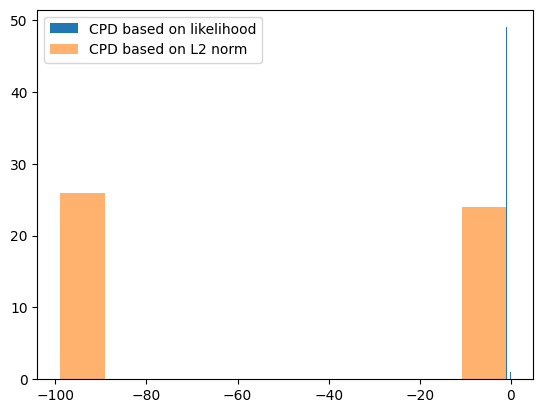

In [ ]:
plt.hist(np.where(t_predicted_cp==-1, -99, t_predicted_cp - t_cp_idxs), label="CPD based on likelihood");
plt.hist(np.where(norm_predicted_cp==-1, -99, t_predicted_cp - t_cp_idxs), alpha=0.6, label="CPD based on L2 norm");
plt.legend();